## Regression Week 4: Ridge Regression Assignment 2

In this assignment, you will implement ridge regression via gradient descent. You will:

- Convert an SFrame into a Numpy array (if applicable)
- Write a Numpy function to compute the derivative of the regression weights with respect to a single feature
- Write gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty

In [1]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
train=pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_train_data.csv',dtype=dtype_dict)

In [41]:
sales=pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/kc_house_data.csv',dtype=dtype_dict)

In [79]:
test=pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_test_data.csv',dtype=dtype_dict)

Next, from Module 2, copy and paste the ‘get_numpy_data’ function (or equivalent) that takes a dataframe, a list of features (e.g. [‘sqft_living’, ‘bedrooms’]), to be used as inputs, and a name of the output (e.g. ‘price’). This function returns a ‘feature_matrix’ (2D array) consisting of first a column of ones followed by columns containing the values of the input features in the data set in the same order as the input list. It alsos return an ‘output_array’ which is an array of the values of the output in the data set (e.g. ‘price’).

In [71]:
def get_numpy_data(data,feature,output):
    output=DataFrame(data,columns=output)
    output_array=output.values.reshape(len(data))
    data['w0']=pd.Series(np.ones(len(data)))
    features=DataFrame(data,columns=feature)
    features_array=np.array(features)
    return(features_array,output_array)

In [72]:
get_numpy_data(train,['w0','sqft_living'],['price'])

(array([[  1.00000000e+00,   1.96000000e+03],
        [  1.00000000e+00,   5.42000000e+03],
        [  1.00000000e+00,   1.16000000e+03],
        ..., 
        [  1.00000000e+00,   3.51000000e+03],
        [  1.00000000e+00,   1.02000000e+03],
        [  1.00000000e+00,   1.02000000e+03]]),
 array([  604000.,  1225000.,   468000., ...,  1007500.,   402101.,
          325000.]))

Similarly, copy and paste the ‘predict_output’ function (or equivalent) from Module 2. This function accepts a 2D array ‘feature_matrix’ and a 1D array ‘weights’ and return a 1D array ‘predictions’.



In [34]:
def predict_output(feature_matrix,weights):
    predictions=np.dot(feature_matrix,weights)
    return predictions

We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.

In [74]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant:
        derivative=2*np.dot(errors,feature)
    else:
        derivative = 2*np.dot(errors,feature) + 2*l2_penalty*weight
    return derivative

In [42]:
(example_features, example_output) = get_numpy_data(sales, ['w0','sqft_living'], ['price'])
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.


[ -5.65541668e+13]
-5.6554166816e+13

[ -2.24467493e+10]
-22446749330.0


Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.

The amount by which we move in the negative gradient direction is called the ‘step size’. We stop when we are ‘sufficiently close’ to the optimum. Unlike in Module 2, this time we will set a maximum number of iterations and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

With this in mind, write a gradient descent function using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria. The function will take the following parameters:



In [73]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations):
    weights = np.array(initial_weights)# make sure it's a numpy array
        #while not reached maximum number of iterations:
    itera=0
    while itera<max_iterations:
        # compute the predictions using your predict_output() function
        predictions=predic_output(feature_matrix,weights)
        # compute the errors as predictions - output
        errors=predictions-output
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i==0:          
                derivative=feature_derivative_ridge(errors, feature_matrix[:,0], weights[0], l2_penalty, True)
            else:
                derivative=feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False)
            # subtract the step size times the derivative from the current weight  
                weights[i]=weights[i]-step_size*derivative
            itera=itera+ 1
    return weights

In [75]:
(simple_feature_matrix, output) = get_numpy_data(train, ['w0','sqft_living'], ['price'])


In [45]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [76]:
l2_penalty = 0.0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print simple_weights_0_penalty

[   0.          264.78847265]


In [77]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print simple_weights_high_penalty

[  0.          89.30920184]


In [65]:
simple_feature_matrix.shape

(9761, 2)

In [70]:
output

array([[  604000.,  1225000.,   468000., ...,  1007500.,   402101.,
          325000.]])

## matplotlib plot

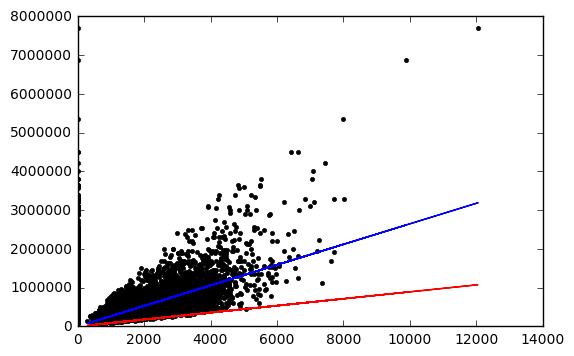

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

## Compute the RSS on the TEST data for the following three sets of weights:

- The initial weights (all zeros)
- The weights learned with no regularization
- The weights learned with high regularization

In [81]:
(simple_feature_matrix, output) = get_numpy_data(test, ['w0','sqft_living'], ['price'])

prediction=predict_output(simple_feature_matrix,simple_weights_0_penalty)

In [82]:
RRS=0
for i in range(len(output)):
    error=prediction[i]-output[i]
    RRS+=error**2
print RRS

1.43086954601e+14
